# <font color='blue'>Concrete Dataset</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O concreto é um dos materiais mais utilizados na construção civil, sendo composto por uma mistura de cimento, agregados graúdos (pedras), agregados miúdos (areia), água e eventualmente aditivos.<br>
O concreto possui uma propriedade conhecida como resistência à compressão, que é medida em megapascal (MPa), e cada 1 mpa corresponde a uma resistência aproximada de 10 kgf/cm². A resistência do concreto à compressão, para um mesmo cimento, sofre influência de alguns fatores, como: relação água/cimento, idade do concreto, forma e dimensão do corpo de prova e qualidade dos materiais. <br>
Nosso trabalho será construir um modelo preditivo capaz de prever a resistência à compressão do concreto com  base  em  uma  série  de  características  e  ingredientes  da sua mistura. <br>
Usaremos  um  dataset disponível publicamente no repositório de Machine Learning da UCI.<br>
    
Endereço do conjunto de dados: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength <br>
    
Descrição das variáveis:<br>
- **Cement**: Cimento (componente 1). Variável quantitativa medida em kg/m$^3$ da mistura; <br> 
- **Blast Furnace Slag**: Escória de Alto Forno (componente 2). Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Fly Ash**: Cinza volante (componente 3). Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Water**: Água (componente 4). Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Superplasticizer**: Superplastificante (componente 5)Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Coarse Aggregate**: Agregado graúdo (componente 6). Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Fine Aggregate**: Agregado Fino (componente 7). Variável quantitativa medida em kg/m$^3$ da mistura; <br>
- **Age**: Idade. Variável quantitativa medida em dias variando de 1 a 365. <br>
- **Concrete compressive strength**: Resistência à compressão do concreto. Variável alvo medida em MPa.     

</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Seleção de variáveis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import r2_score, mean_absolute_error

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Coletando os dados 
df = pd.read_excel('Dados/Concrete-Data/Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
# Renomeando as colunas
colunas = ["Cimento", "Escoria_alto_forno", "Cinza_volante", "Agua", "Superplastificante", "Agregado_graudo", "Agregado_fino", "Idade", "Resistencia_compressao"]
df.columns = colunas

# Separando a variável alvo
variavelAlvo = "Resistencia_compressao"

df.head()

,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 3 - Reservar linhas para validar o modelo

In [5]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=21)
dfValidacao

,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
518,202.0,11.0,141.0,206.0,1.72,942.0,801.0,56,23.245191
918,145.0,0.0,179.0,202.0,8.00,824.0,869.0,28,10.535193


In [6]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [8]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cimento                 1028 non-null   float64
 1   Escoria_alto_forno      1028 non-null   float64
 2   Cinza_volante           1028 non-null   float64
 3   Agua                    1028 non-null   float64
 4   Superplastificante      1028 non-null   float64
 5   Agregado_graudo         1028 non-null   float64
 6   Agregado_fino           1028 non-null   float64
 7   Idade                   1028 non-null   int64  
 8   Resistencia_compressao  1028 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.4 KB


In [9]:
# Sumário estatístico
df.describe()

,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,281.375097,74.028551,53.981274,181.522714,6.205725,973.093531,773.459387,45.669261,35.854660
std,104.493119,86.309872,63.882505,21.353187,5.977405,77.684455,80.193548,63.228166,16.698668
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,193.125000,0.000000,0.000000,164.900000,0.000000,932.000000,730.300000,7.000000,23.742796
50%,273.000000,22.000000,0.000000,185.000000,6.350000,968.000000,779.320000,28.000000,34.522063
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.208682
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### 4.2 - Tratando valores nulos

In [10]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum()

Cimento                   0
Escoria_alto_forno        0
Cinza_volante             0
Agua                      0
Superplastificante        0
Agregado_graudo           0
Agregado_fino             0
Idade                     0
Resistencia_compressao    0
dtype: int64

#### 4.2 - Tratando dados duplicados

In [11]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira é igual a outra
df.duplicated().sum()

25

In [12]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df.drop_duplicates(ignore_index=True, inplace = True)

In [13]:
# Verificando a quantidade de linhas do dataset
df.shape[0]

1003

#### 4.3 - Tratando valores únicos

In [14]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

Cimento                   280
Escoria_alto_forno        187
Cinza_volante             162
Agua                      205
Superplastificante        155
Agregado_graudo           284
Agregado_fino             303
Idade                      14
Resistencia_compressao    936
dtype: int64

#### 4.2 - Análise descritiva dos dados

##### 4.2.1 - Parâmetros dos gráficos

In [15]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.2.2 - Funções para desenhar os gráficos

###### a) Histograma

In [16]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [17]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Scatter Plot

In [18]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### d) Gráfico de Pizza

In [19]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### d) Countplot

In [20]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"), order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### e) Função para verificar Assimetria e Curtose de uma variável

In [21]:
# Verifica a assimetria e a curtose de uma variável
def verificaAssimetriaCurtose(coluna, variavelAnalisada):
    
    # Verificando a assimetria da coluna
    coeficienteAssimetria = coluna.skew()

    if coeficienteAssimetria == 0:
        print("\n- A distribuição dos dados é simétrica, ou seja, a cauda à direita e à esquerda são iguais, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
    elif coeficienteAssimetria < 0:
        print("\n- A distribuição dos dados é assimétrica negativa, ou seja, a cauda é maior à esquerda, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
    else:
        print("\n- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
        
    # Verificando a curtose da coluna
    coeficienteCurtose = coluna.kurtosis()

    if coeficienteCurtose == 0:
        print("\n- A curva apresenta uma distribuição normal, ou seja, mesocúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)
    elif coeficienteCurtose < 0:
        print("\n- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)
    else:
        print("\n- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)

##### 4.2.3 Análise descritiva das variáveis quantitativas

Resumo estatístico da variável Cimento
 count    1003.000000
mean      278.838684
std       104.335452
min       102.000000
25%       190.680000
50%       266.000000
75%       349.000000
max       540.000000
Name: Cimento, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Cimento é:
 0.5627397670322627

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Cimento é:
 -0.4339209020515269


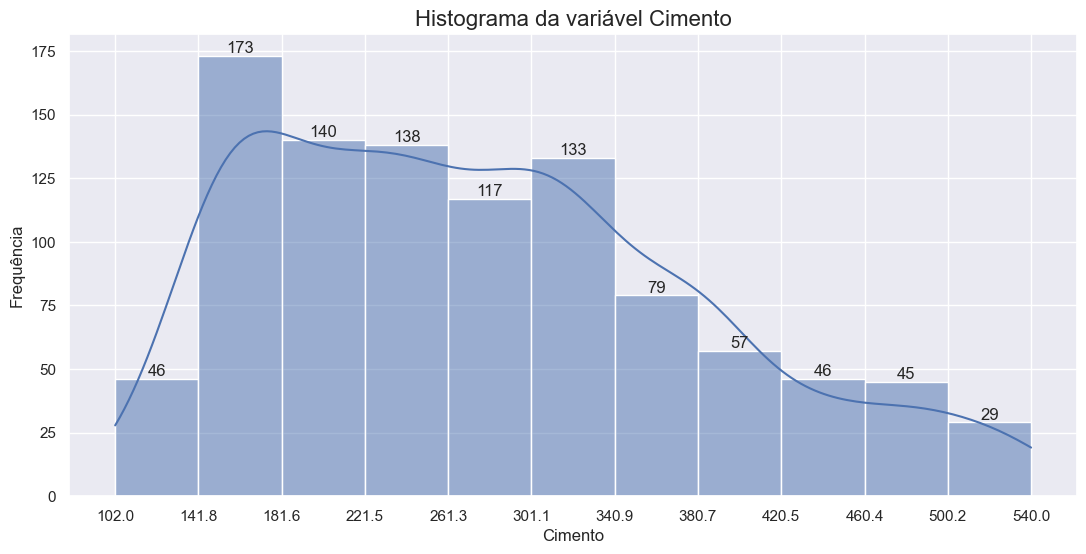

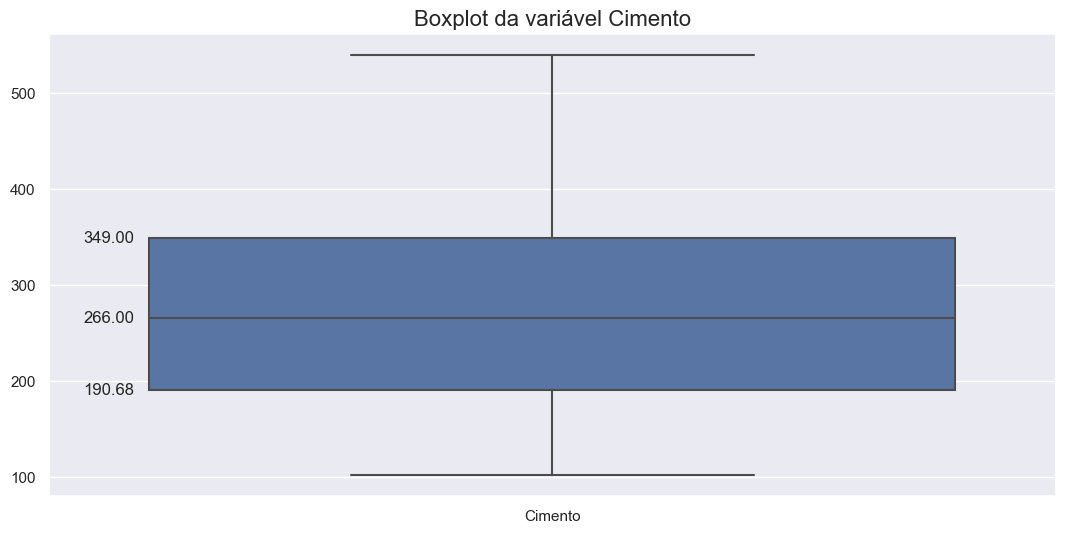

Resumo estatístico da variável Escoria_alto_forno
 count    1003.000000
mean       72.175823
std        86.204811
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       359.400000
Name: Escoria_alto_forno, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Escoria_alto_forno é:
 0.8522473899953654

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Escoria_alto_forno é:
 -0.41209871667961506


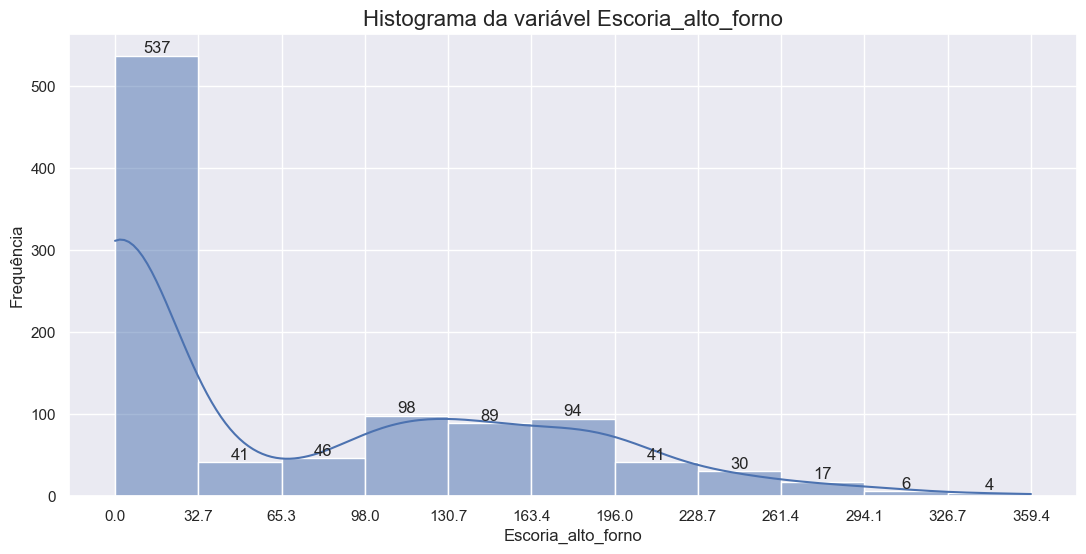

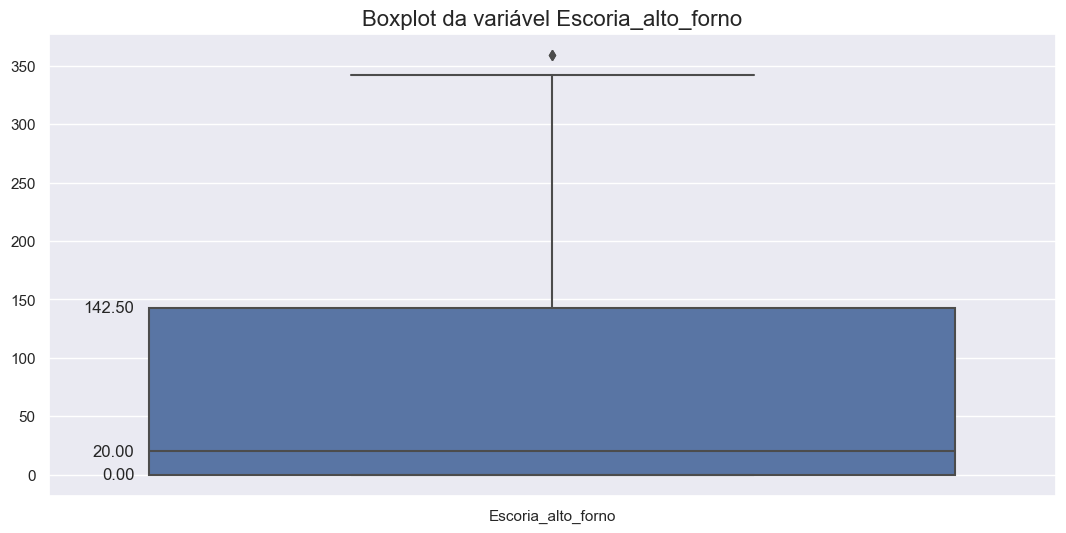

Resumo estatístico da variável Cinza_volante
 count    1003.000000
mean       55.326770
std        64.095857
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: Cinza_volante, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Cinza_volante é:
 0.5011768306621899

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Cinza_volante é:
 -1.362204417369974


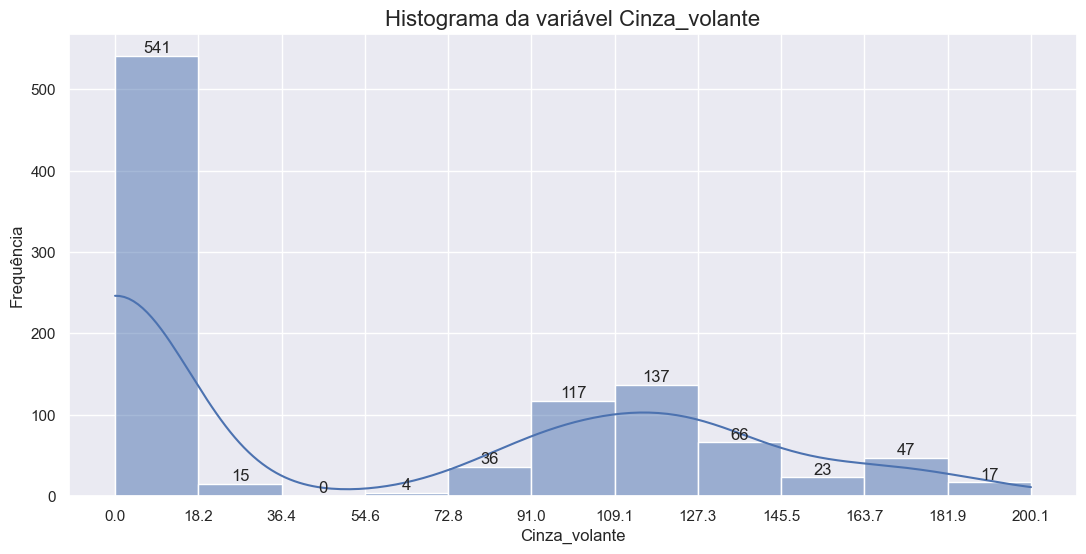

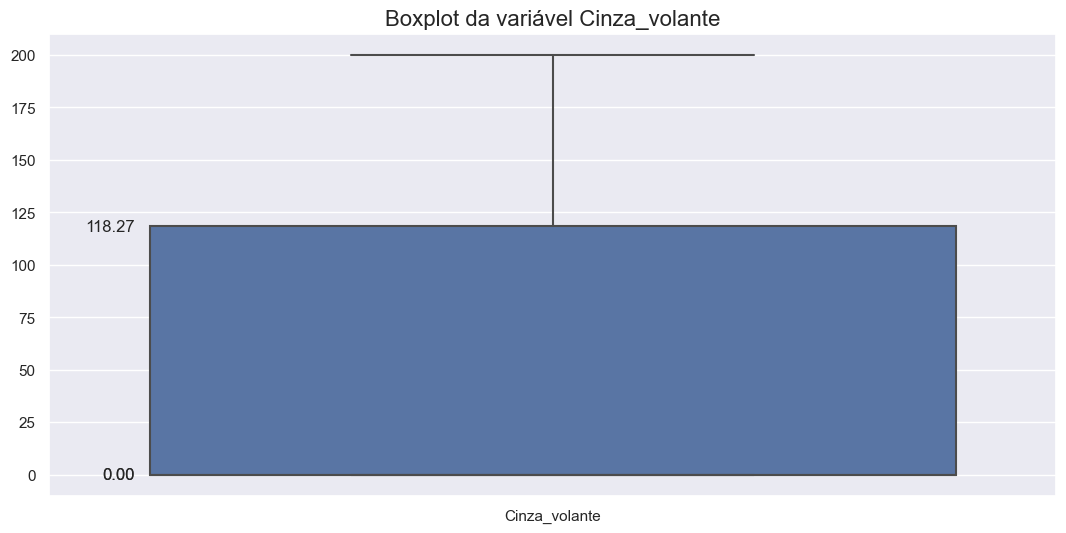

Resumo estatístico da variável Agua
 count    1003.000000
mean      182.030658
std        21.339324
min       121.750000
25%       166.610000
50%       185.700000
75%       192.350000
max       247.000000
Name: Agua, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Agua é:
 0.03812890137079053

- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável Agua é:
 0.17309525541375592


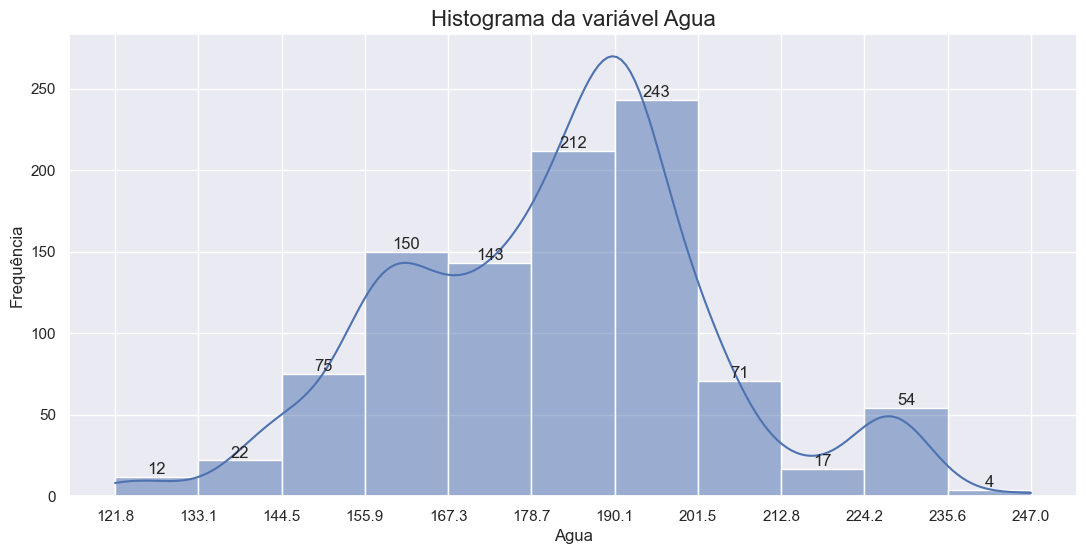

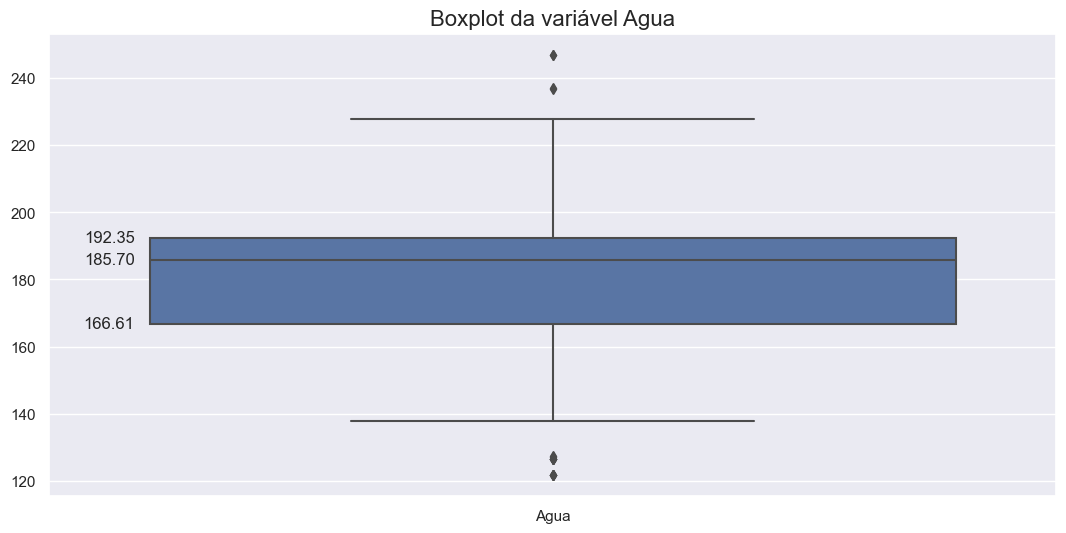

Resumo estatístico da variável Superplastificante
 count    1003.000000
mean        6.033983
std         5.923571
min         0.000000
25%         0.000000
50%         6.100000
75%        10.000000
max        32.200000
Name: Superplastificante, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Superplastificante é:
 0.9807009594519382

- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável Superplastificante é:
 1.6924970738753724


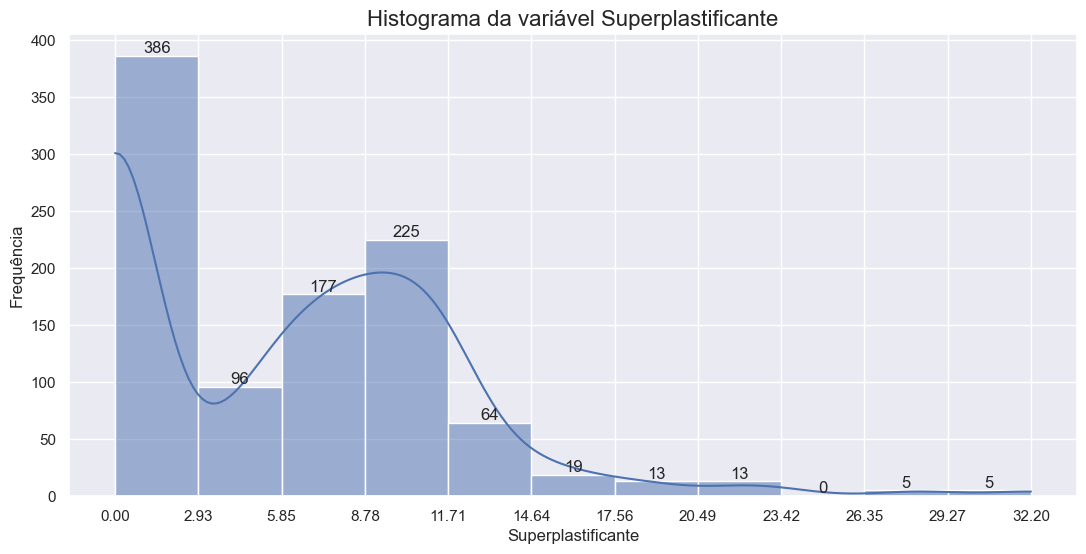

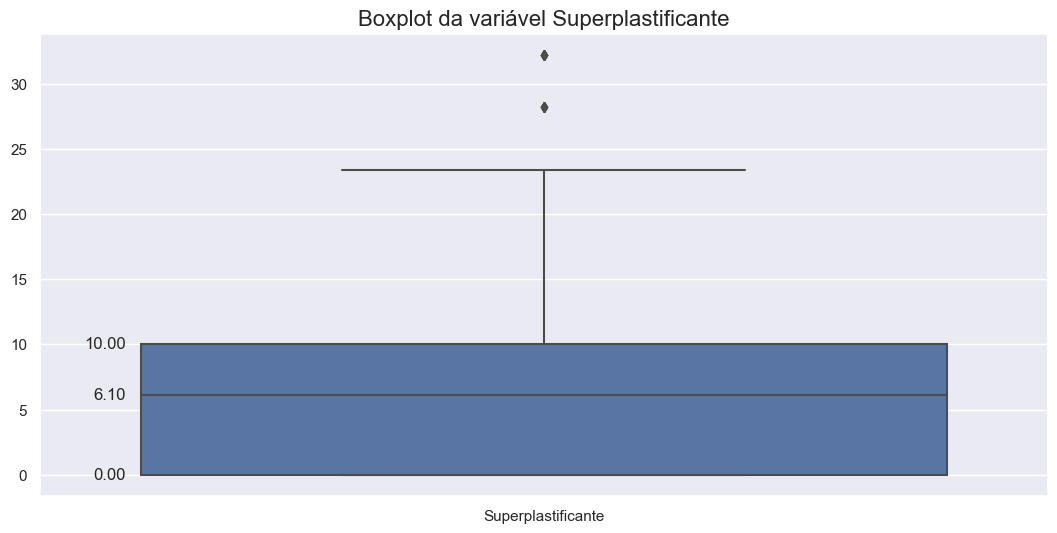

Resumo estatístico da variável Agregado_graudo
 count    1003.000000
mean      974.558674
std        77.504515
min       801.000000
25%       932.000000
50%       968.000000
75%      1032.000000
max      1145.000000
Name: Agregado_graudo, dtype: float64

- A distribuição dos dados é assimétrica negativa, ou seja, a cauda é maior à esquerda, visto que, o coeficiente de assimetria da variável Agregado_graudo é:
 -0.06525270266206244

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Agregado_graudo é:
 -0.5824313950878861


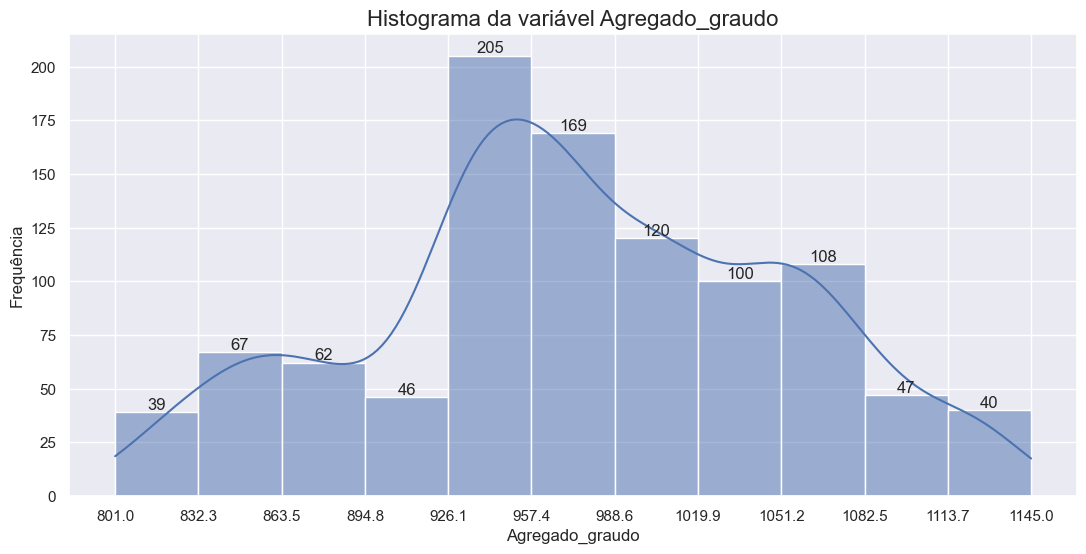

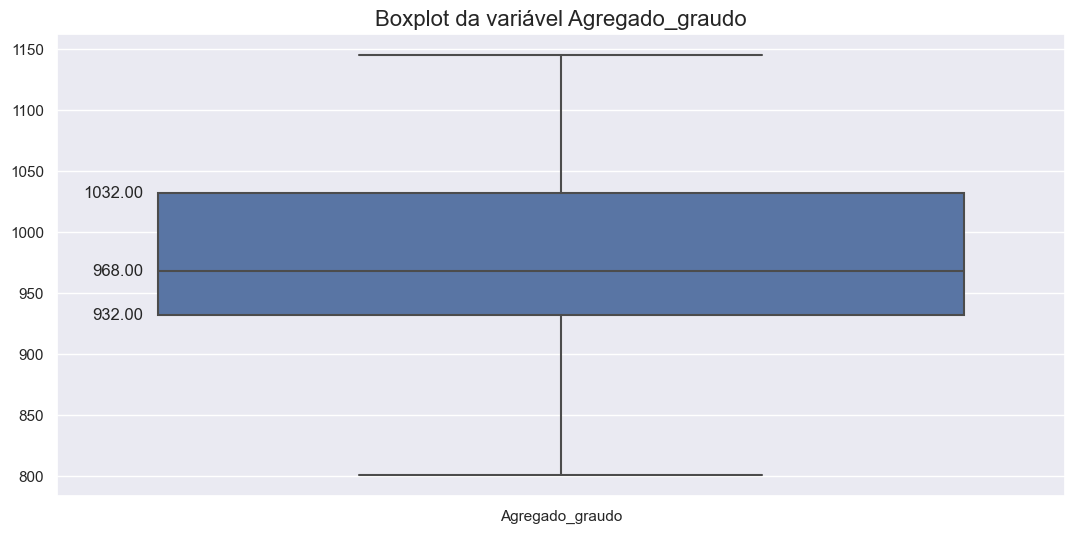

Resumo estatístico da variável Agregado_fino
 count    1003.000000
mean      772.562363
std        80.357337
min       594.000000
25%       724.300000
50%       779.700000
75%       822.200000
max       992.600000
Name: Agregado_fino, dtype: float64

- A distribuição dos dados é assimétrica negativa, ou seja, a cauda é maior à esquerda, visto que, o coeficiente de assimetria da variável Agregado_fino é:
 -0.24977980598389526

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Agregado_fino é:
 -0.10623994949598536


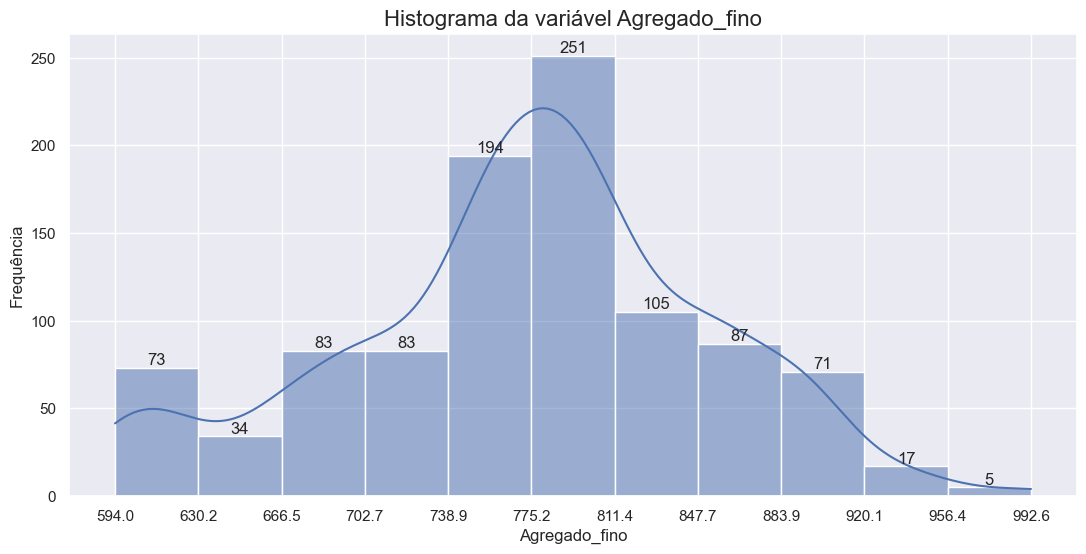

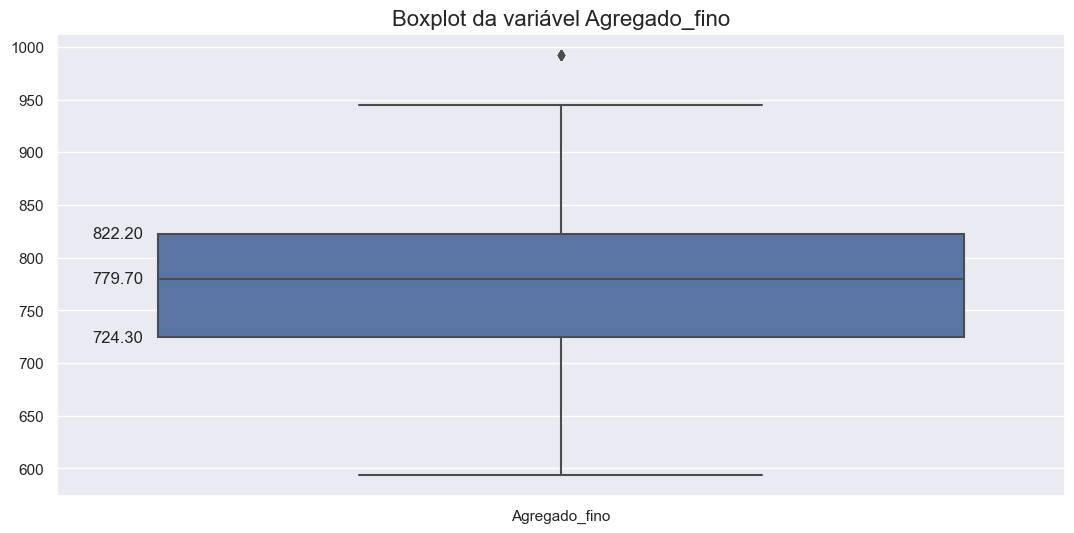

Resumo estatístico da variável Idade
 count    1003.000000
mean       45.864407
std        63.794968
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: Idade, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Idade é:
 3.25090394294874

- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável Idade é:
 11.933811461148794


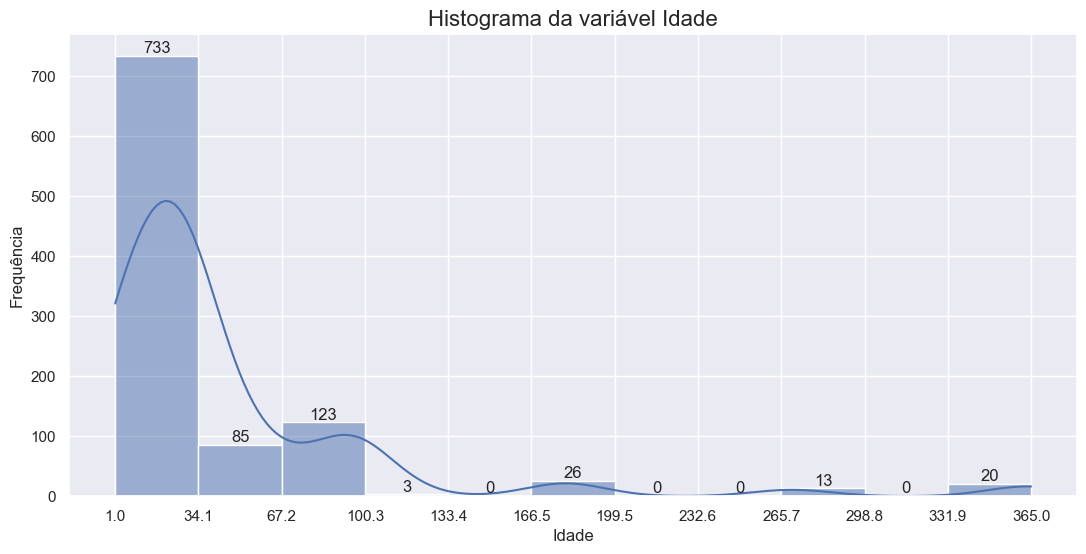

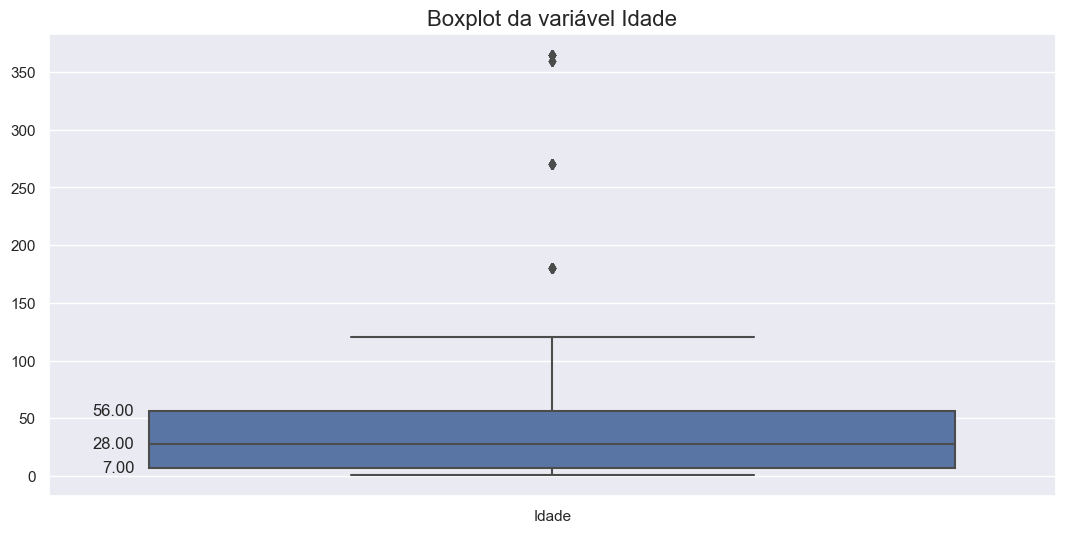

In [22]:
# Loop que percorre todas as colunas
for k in df.columns[0:len(df.columns)-1]:
    # Verifica se a coluna não possui valores do tipo texto
    if df[k].dtypes != object:
        
        # Sumário estatístico
        print("Resumo estatístico da variável " + k + "\n", df[k].describe())
        
        # Verifica a assimetria e a curtose da variável
        verificaAssimetriaCurtose(df[k], k)
                
        # Histograma
        desenhaHistograma(df[k], k)
        
        # Boxplot
        desenhaBoxplot(df[k], k)

##### 4.2.4 Análise descritiva das variáveis Categóricas

In [ ]:
# Loop que percorre todas as colunas
for k in df.columns[0:len(df.columns)-1]:
    # Verifica se a coluna possui valores do tipo texto
    if df[k].dtypes == object:
        
        # Frequência absoluta 
        desenhaCountPlot(df[k], k)
        
        # Percentuais
        desenhaPizza(df[k], k)       

##### 4.2.5 Análise descritiva da variável alvo

In [23]:
# Sumário estatístico
pd.DataFrame(df[variavelAlvo].describe())

,Resistencia_compressao
count,1003.000000
mean,35.286883
std,16.277884
min,2.331808
25%,23.524576
50%,33.798114
75%,44.976588
max,82.599225


In [24]:
# Assimetria e curtose da variável alvo
verificaAssimetriaCurtose(df[variavelAlvo], variavelAlvo)


- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Resistencia_compressao é:
 0.39409093606850426

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável Resistencia_compressao é:
 -0.30460151595935336


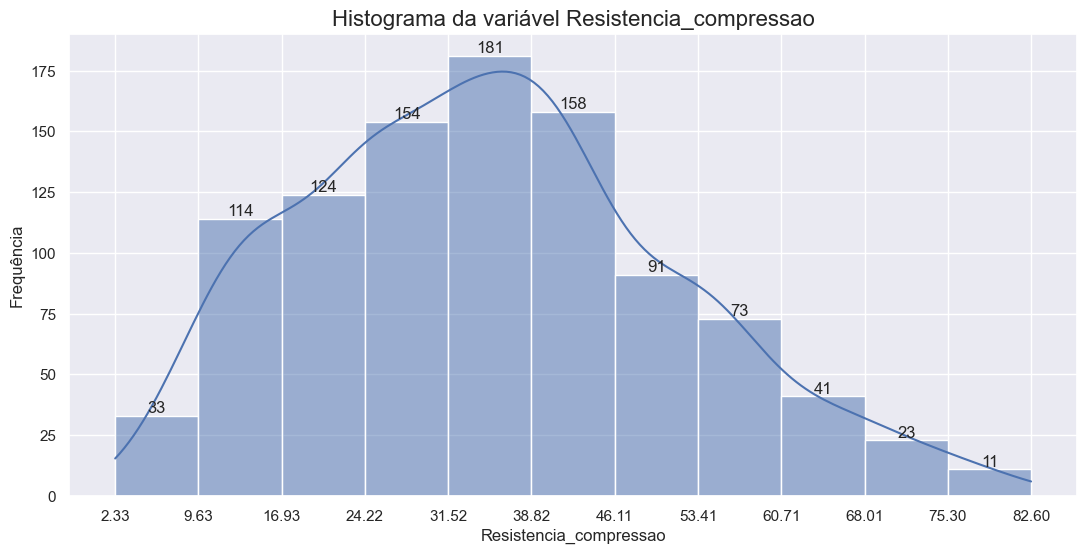

In [25]:
# Frequência absoluta 
desenhaHistograma(df[variavelAlvo], variavelAlvo)

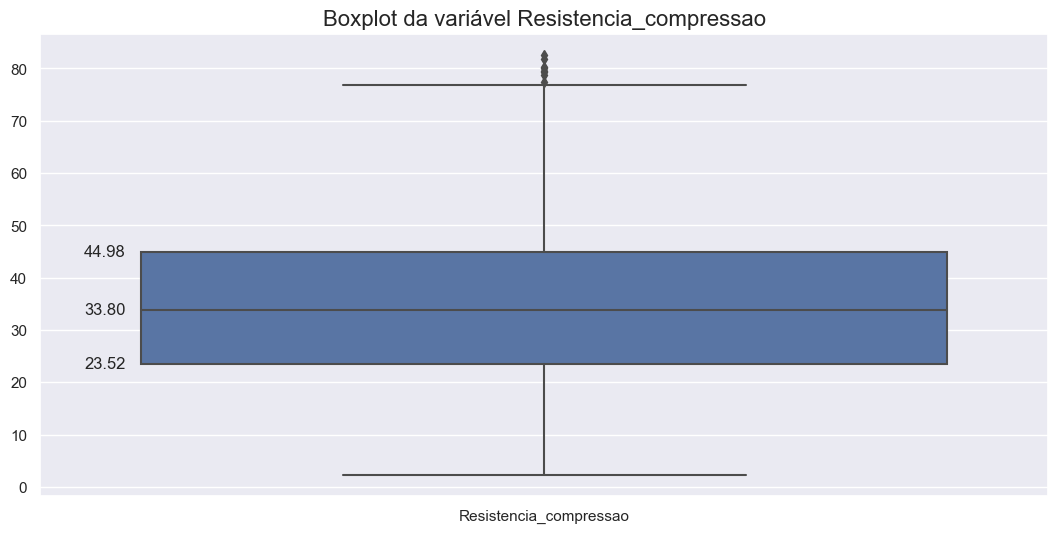

In [26]:
# Percentuais
desenhaBoxplot(df[variavelAlvo], variavelAlvo)

##### 4.2.6 - Correlação entre as variáveis

###### 4.2.6.1 - Matriz de correlação 

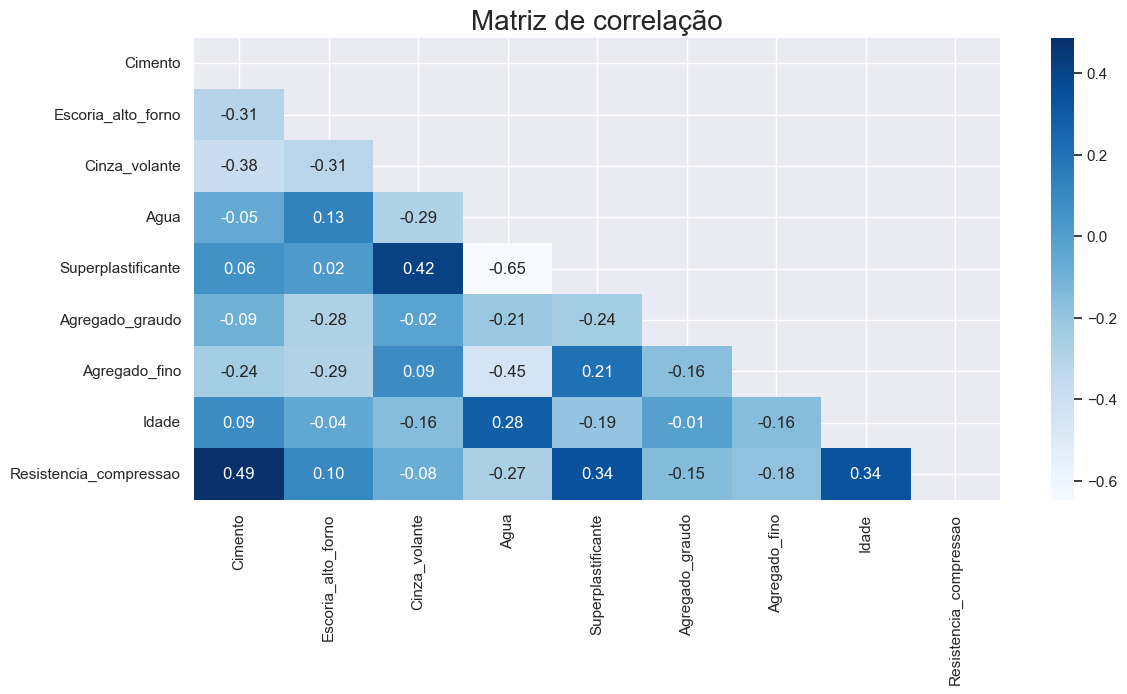

In [27]:
# Calculando a correlação 
correlacao = df.corr()

# Criando uma máscara
mascara = np.zeros_like(correlacao)

# Selecionando a matriz triangular inferior da máscara.
mascara[np.triu_indices_from(mascara)] = True

# Cria a matriz de correlação
fig = plt.subplots(figsize=(13, 6))
sns.heatmap(data = correlacao,
            mask = mascara,
            annot = True,
            fmt = '.2f',
            cmap='Blues',

            )
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

###### 4.2.6.2 - Correlação entre a variável Superplastificante e a variável alvo

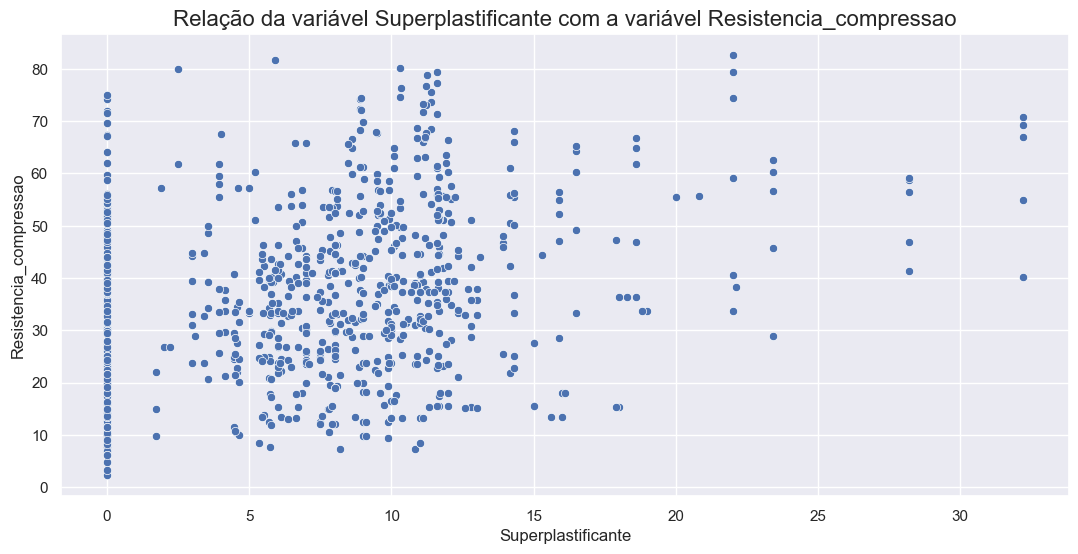

In [28]:
# ScatterPlot
desenhaScatterPlot(df["Superplastificante"], df[variavelAlvo], "Superplastificante", variavelAlvo )

###### 4.2.6.3 - Correlação entre a variável Idade e a variável alvo

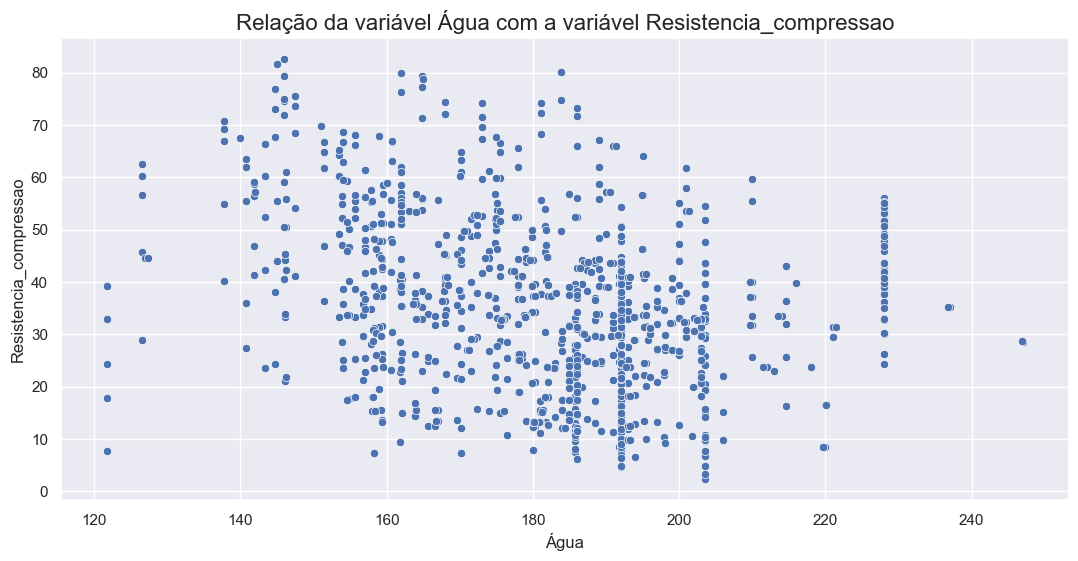

In [29]:
# ScatterPlot
desenhaScatterPlot(df["Agua"], df[variavelAlvo], "Água", variavelAlvo )

## 5 - Transformando os dados

In [30]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 Tratando valores iguais a zero

In [31]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:13]:
    
    # Verifica se os valores não são do tipo texto
    if df2[k].dtype != object:
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

Cimento: 0
Escoria_alto_forno: 464
Cinza_volante: 541
Agua: 0
Superplastificante: 378
Agregado_graudo: 0
Agregado_fino: 0
Idade: 0
Resistencia_compressao: 0


### 5.2 - Identificando e tratando valores outliers

In [ ]:
# Loop que percorre todas as colunas
# A notação de slicing [0:len(df.columns)-1] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:len(df.columns)-1]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df2[k].dtype != object:
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

### 5.3 - Convertendo variáveis categóricas em números

#### 5.3.1 Convertendo as variáveis preditoras de texto para número

In [ ]:
# Verificando o tipo de dados das colunas
df2.info()

##### 5.3.2.1 Encoding com o Pandas

In [ ]:
df3 = pd.get_dummies(df2)
df3.head()

In [ ]:
# Visualizando o nome das colunas
df3.columns

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

## 6 - Dividindo os dados em treino e teste

ATENÇÃO!! Qual o dataframe será utilizado df2 ou df3 ?

In [32]:
# Fazendo uma cópia do dataframa
dfDados = df2.copy()

In [33]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:numeroVariaveisPreditoras] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:numeroVariaveisPreditoras]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [34]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

,random_state,R2
64,65,95.7


In [35]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

In [36]:
# Criando um objeto da classe SFS para selecionar as melhores variáveis preditoras conforme R2, utilizando o algoritmo XGBRegressor.
sfs = SFS (
    estimator  = XGBRegressor(), 
    k_features = numeroVariaveisPreditoras,
    forward    = True, 
    floating   = False, 
    scoring    = 'r2',
    cv         = 3
)

# Pesquisando as melhores variáveis preditoras.
sfs = sfs.fit(
    X = dfDados[dfDados.columns[0:numeroVariaveisPreditoras]], 
    y = dfDados[variavelAlvo], 
)

# Convertendo o resultado da pesquisa das melhores variáveis para um dataframe.
# O método "T" transforma linhas em colunas e colunas em linhas
dfSelecaoVariaveis = pd.DataFrame(sfs.subsets_).T

# Converte a coluna "avg_score" para o tipo float
dfSelecaoVariaveis.avg_score = dfSelecaoVariaveis.avg_score.astype(float)

# Ordena o dataframe de acordo a variável "avg_score" do maior para o menor
dfSelecaoVariaveis.sort_values(by=["avg_score"], ascending=False, inplace=True)
dfSelecaoVariaveis

,feature_idx,cv_scores,avg_score,feature_names
5,"(0, 1, 2, 3, 7)","[0.7624664486715221, 0.7453765692673457, 0.623...",0.710409,"(Cimento, Escoria_alto_forno, Cinza_volante, A..."
4,"(0, 1, 3, 7)","[0.7176109219133291, 0.7236386816243094, 0.657...",0.699712,"(Cimento, Escoria_alto_forno, Agua, Idade)"
6,"(0, 1, 2, 3, 6, 7)","[0.7574749672713084, 0.7235651441296185, 0.589...",0.690231,"(Cimento, Escoria_alto_forno, Cinza_volante, A..."
7,"(0, 1, 2, 3, 5, 6, 7)","[0.7146768176923042, 0.7518229721466436, 0.527...",0.664718,"(Cimento, Escoria_alto_forno, Cinza_volante, A..."
3,"(0, 1, 7)","[0.49302208147753357, 0.5185438504650115, 0.64...",0.551830,"(Cimento, Escoria_alto_forno, Idade)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6900702233828866, 0.7433650820431423, 0.209...",0.547593,"(Cimento, Escoria_alto_forno, Cinza_volante, A..."
2,"(0, 7)","[0.25774086469519464, 0.4139331261920811, 0.20...",0.292171,"(Cimento, Idade)"
1,"(7,)","[0.12040631542938862, 0.3837978660045376, -0.0...",0.156498,"(Idade,)"


In [37]:
# Escolhendo as melhores variáveis
melhoresVariaveis = dfSelecaoVariaveis.iloc[0,3]

# Convertendo a Tupla para uma lista
variaveisSelecionadas = list(melhoresVariaveis)
variaveisSelecionadas

['Cimento', 'Escoria_alto_forno', 'Cinza_volante', 'Agua', 'Idade']

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [38]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [39]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

,random_state,R2
64,65,96.53


In [40]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Cross Validation

In [41]:
def calculaCrossValidation(dadosEntrada, dadosSaida):
    # Criando uma lista vazia para armazenar os modelos de Machine Learning
    modelos = []
    
    # Adicionando os modelos a lista
    modelos.append(("Regressão Linear", LinearRegression()))
    modelos.append(("Ridge", Ridge()))
    modelos.append(("KNN", KNeighborsRegressor()))
    modelos.append(("SVM", LinearSVR()))
    modelos.append(("Árvore de Decisão", DecisionTreeRegressor()))
    modelos.append(("Random Forest", RandomForestRegressor()))
    modelos.append(("Extra Tree", ExtraTreesRegressor()))
    modelos.append(("Bagging", BaggingRegressor()))
    modelos.append(("AdaBoost", AdaBoostRegressor()))
    modelos.append(("Voting", VotingRegressor(estimators=[("AD",DecisionTreeRegressor()),("GB", GradientBoostingRegressor()),("RL", LinearRegression())])))
    modelos.append(("Gradient Tree Boosting", GradientBoostingRegressor()))
    modelos.append(("XGBoost", XGBRegressor()))    

    # Criando um Dataframe para armazenar a média de cada um dos algoritmos testados.
    dfMedias   = pd.DataFrame(columns = ['Algoritmo', 'Media'])

    # Define a quantidade de folds
    numeroFolds = 5

    # Define a semente para criar os folds
    seed = 28

    # KFold divide o conjunto de dados em grupos de amostras, chamados folds
    kfold = KFold(n_splits = numeroFolds, shuffle=True, random_state = seed)

    for nome, construtor in modelos:
        # Cross Validation
        resultados = cross_val_score(construtor, dadosEntrada, dadosSaida, cv=kfold, scoring="r2")

        # Calcula a média dos resultados
        media = resultados.mean()*100

        # Define os parâmetros para adicionar a linha no dataframe
        novaLinha = {"Algoritmo": nome,
                     "Media": media}

        # Adicionando uma linha no final do DataFrame
        dfMedias.loc[len(dfMedias.index)] = novaLinha

    # Ordena o dataframe da maior média para a menor    
    dfMedias.sort_values(by=["Media"], ascending=False, inplace=True)
    
    return dfMedias

### 9.1 - Cross Validation com dados originais

In [42]:
# Calcula cross validation
calculaCrossValidation(X, y)

,Algoritmo,Media
11,XGBoost,92.188031
6,Extra Tree,90.451186
5,Random Forest,89.878627
10,Gradient Tree Boosting,88.756264
7,Bagging,88.583465
9,Voting,86.308253
4,Árvore de Decisão,83.267341
8,AdaBoost,76.084255
2,KNN,75.434885
1,Ridge,58.880390


### 9.2 - Cross Validation com dados normalizados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de entrada
xNormalizado = min_max_scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xNormalizado, y)

### 9.3 - Cross Validation com dados padronizados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de entrada
xPadronizado = scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xPadronizado, y)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [43]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de regressão

In [44]:
# DataFrame para comparar a acurácia de cada algoritmo
# DataFrame para comparar a R2 de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Extra Tree", "XGBRegressor", "Random Forest"],
                   "R2": ["-", "-", "-"],
                   "Erro Absoluto Medio": ["-", "-", "-"]
                   }
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Extra Tree,-,-
1,XGBRegressor,-,-
2,Random Forest,-,-


### 11.11 - Extra Tree Regressor

In [45]:
# Criando o modelo
extraTreesRegressor = ExtraTreesRegressor()

# Treinamento do modelo
extraTreesRegressor.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = extraTreesRegressor.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 94.01%
Erro absoluto médio: 2.84


In [46]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[0,2] =  round(mae,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Extra Tree,94.01,2.84
1,XGBRegressor,-,-
2,Random Forest,-,-


### 11.12 - XGBoost Regressor

In [47]:
# Criando o modelo
xgb = XGBRegressor()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 96.53%
Erro absoluto médio: 2.23


In [48]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[1,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Extra Tree,94.01,2.84
1,XGBRegressor,96.53,2.23
2,Random Forest,-,-


### 11.3 - Random Forest Regressor

In [49]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
randomForestRegressor = RandomForestRegressor(random_state=6)

# Treinamento do modelo
randomForestRegressor.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestRegressor.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 93.75%
Erro absoluto médio: 3.11


In [50]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[2,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Extra Tree,94.01,2.84
1,XGBRegressor,96.53,2.23
2,Random Forest,93.75,3.11


## 12 - Selecionando o modelo

In [51]:
# Ordena o DataFrame de acordo o valor do Erro Absoluto Medio, em ordem crecente
dfComparaAlgoritmo.sort_values(by=["Erro Absoluto Medio"], inplace=True)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
1,XGBRegressor,96.53,2.23
0,Extra Tree,94.01,2.84
2,Random Forest,93.75,3.11


In [52]:
# Selecionando o modelo final
modeloFinal = xgb
modeloFinal

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [53]:
# Salvando o modelo
arquivo = 'Dados/Concrete-Data/modeloRegressorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [54]:
# Carregando o modelo
modeloRegressor = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloRegressor

Modelo carregado!


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [55]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/Concrete-Data/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/Concrete-Data/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [56]:
# Visualizando o dataframe
dfValidacao

,Cimento,Escoria_alto_forno,Cinza_volante,Agua,Superplastificante,Agregado_graudo,Agregado_fino,Idade,Resistencia_compressao
518,202.0,11.0,141.0,206.0,1.72,942.0,801.0,56,23.245191
918,145.0,0.0,179.0,202.0,8.00,824.0,869.0,28,10.535193


In [57]:
# Visualizando as variáveis selecionadas
variaveisSelecionadas

['Cimento', 'Escoria_alto_forno', 'Cinza_volante', 'Agua', 'Idade']

In [58]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[variaveisSelecionadas].values
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloRegressor.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDadosPadronizados)

previsoes

array([27.155952, 11.500666], dtype=float32)